<a href="https://colab.research.google.com/github/ssanudo/ProcesamDigImagTP/blob/main/TP5/PDI_TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#La Transformada de Fourier
La transformada de Fourier es una importante herramienta en procesamiento de imágenes la cual es utilizada para descomponer una imagen en sus componentes seno y coseno. La salida de la transformación representa la imagen en el dominio de Fourier o dominio de la frecuencia, mientras que la imagen de entrada está en el dominio espacial. Cada punto de la imagen en el dominio
de Fourier representa una frecuencia particular contenida en la imagen en el dominio del espacio.
La transformada de Fourier se utiliza en un amplio rango de aplicaciones, tales como análisis de imágenes, filtrado de imágenes, reconstrucción de imágenes y compresión de imágenes.

El espectro de frecuencias de una imagen puede calcularse de varias maneras, pero la método FFT es el único que es práctico. La imagen original debe estar compuesta de N filas por M columnas. Vamos a llamar la matriz bidimensional que contiene la imagen la matriz real. Además se necesita otra matriz del mismo tamaño, la matriz imaginaria.
La receta para el cálculo de la transformada de Fourier de una imagen es
bastante simple: tomar la FFT unidimensional de cada una de las filas, seguidas
por la FFT unidimensional de cada una de las columnas:
Específicamente, empezar por tomar la FFT de los N valores de píxeles
en fila 0 de la matriz real. La parte real de la FFT salida se encuentra
colocado en fila 0 de la matriz real, mientras que la parte imaginaria de
salida de la FFT se coloca en fila 0 de la matriz imaginaria.
Después de repetir este procedimiento en las filas 1 hasta N - 1, las matrices
reales e imaginarias contienen una imagen intermedia.
A continuación, el procedimiento se repite en cada uno de los columnas
de los datos intermedios: Tomar M valores de píxeles de la columna 0 de
la matriz real y los M valores de píxeles de la columna 0 de la matriz
imaginaria, y calcular la FFT. La parte real de salida de la FFT se coloca
en la columna 0 de la matriz real, mientras que la parte imaginaria de la
salida de la FFT colocado en la columna 0 de la matriz imaginaria.
Después de esto se repite en columnas 1 a través de N & 1, ambas matrices
han sido sobrescritos con la imagen espectro de frecuencias.
Dado que las direcciones verticales y horizontales son equivalentes en una imagen, esto algoritmo puede realizarse también por transformar primero las columnas y luego la transformación de las filas. Independientemente del orden que se utiliza, el resultado sera el mismo. De la forma en que la FFT hace el seguimiento de los datos, la amplitud de los componentes FFT de baja frecuencia
terminan en las esquinas de las dos dimensiones, mientras que las frecuencias
altas estan en el centro. La transformada inversa de Fourier de una imagen se
calcula tomando la FFT inversa de cada fila, seguido por la FFT inversa de
cada columna (o viceversa).



#Transformada de Fourier discreta bidimensional
Siendo la transformada de Fourier un operador lineal y separable (así como su versión discreta e inversa), entonces la TF discreta bidimensional es

$E(F_{h},F_{v})=\frac{1}{N M}\sum_{m=0}^{M-1}\sum_{n=0}^{N-1}f(n_x,n_y)exp{_{}}^{-2\pi i[\frac{m F_h}{M} +\frac{n F_v}{N}]}$

Por cuestiones de simetría y facilidad de interpretación, la representación del espectro de una imágen se hace con una traslación periódica, de manera que el (0,0) en frecuencias quede en el centro del espectro.





#Practico TP5 (Transformada de Fourier y procesamiento espectral)

El objetivo de este TP es implementar un aplicativo que permita la generación de la Transformada de Fourier (TF) directa e Inversa de Imágenes, este debe permitir:
* Cargar una imagen
* Generar la TF directa de la imagen y ver su espectro
* A partir del espectro generado mediante la TF inversa obtener la imagen
* Debe permitir guardar el espectro de amplitud de una imagen en un bitmap
* Debe permitir cargar el espectro de imagen a partir de un bitmap

Con estas consignas se cumple en la **Parte 1** del siguiente script.
Para esto se deben hacer pruebas con diferentes figuras geométricas (Cuadrados, rectángulos, círculos, elipses, rombos, dos o más objetos, etc.) (mostrar los espectros de mínimo 5 figuras diferentes)
Con esta consigna se cumple en la **Parte 2** del siguiente script.
* Adicionalmente con una imagen de su elección guardar el espectro de amplitud de la imagen en un bitmap, luego editarlo con un editor gráfico (por ejemplo, Paint), cargarlo al aplicativo y finalmente aplicar la transformada inversa (preservando la fase) para ver los efectos.
Nota: se sugiere usar los widgets tipo botón para ejecutar las operaciones mencionadas y que el aplicativo interactivo tengas todas las funciones en el mismo entorno.
Por favor revisar cuidadosamente los videos de la teoría donde se explica cuidadosamente todas las características que se desea tenga el aplicativo.
Fecha de Entrega: 22 de octubre 2021

In [1]:
import imageio
from scipy import fftpack as fp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [13]:
#Funciones

def ImgShapeShow(im):#muestra datos de forma del arreglo obtenido de las imágenes
  print('Tamaño del arreglo',im.shape, 'donde', im.shape[0], 'x',im.shape[1],'es el tamaño de la imágen en píxeles, y ',im.shape[2], 'es el valor RGB de cada uno de dichos píxeles' )
  

def open_img(file_path):#Abre la imágen, y muestra datos de forma
  im=imageio.imread(file_path)
  ImgShapeShow(im)
  if (im.shape[2]==4):im=im[:,:,0:3]
  im = im.astype(np.int)
  return im

def save_img(im,imgName): #guarda la imagen con el nombre imgName
  imgName=imgName+'.png'
  imageio.imwrite(imgName, im.astype(np.uint8))

def normalizeRGB(x):return np.array((x - 0) / (255))
#Normaliza [0-255] RGB de la imagen en el rango [0,1], x es el arreglo de RGB de la img.

def normalizeY(y,yMin,yMax):return np.array((y - yMin) / (yMax-yMin))
#Normaliza y, lo estira, a [0,1], y es el arreglo de Luminancia de la img.


#Defino las matrices de conversión, de RGB a YIQ y viseversa.
rgb2yiq=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
#print(rgb2yiq)
yiq2rgb=np.array([[1,0.9663,0.621],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
#print(yiq2rgb)


def RGB2YIQ(im): #función que convierte de RGB a YIQ de una imágen
  #Normalizo valores RGB de 0-255 a 0-1
  imNorm=normalizeRGB(im.copy())
  #Obtengo valores de YIQ 
  im_YIQ=np.dot(imNorm, rgb2yiq.T)
  im_YIQ[:,:,0][im_YIQ[:,:,0]>=1]=1
  im_YIQ[:,:,0][im_YIQ[:,:,0]<0]=0
  im_YIQ[:,:,1][im_YIQ[:,:,1]<-0.5957]=-0.5957
  im_YIQ[:,:,1][im_YIQ[:,:,1]>0.5957]=0.5957
  im_YIQ[:,:,2][im_YIQ[:,:,2]<-0.5226]=-0.5226
  im_YIQ[:,:,2][im_YIQ[:,:,2]>0.5226]=0.5226
  #Vuelvo a RGB normalizado
  YIQcFin=np.dot(im_YIQ, yiq2rgb.T)
  #Desnormalizo
  YIQcFin=YIQcFin*255
  ImC=YIQcFin.astype(np.int)
  return im_YIQ

def YIQ2RGB(im_YIQ):
  #Vuelvo a RGB normalizado
  RGBFin=np.dot(im_YIQ, yiq2rgb.T)
  #Desnormalizo
  RGBFin=RGBFin*255
  ImC=RGBFin.astype(np.int)
  return ImC

def RGB2Y(im): #función que convierte de RGB a YIQ de una imágen
  #Normalizo valores RGB de 0-255 a 0-1
  imNorm=normalizeRGB(im.copy())
  #Obtengo valores de YIQ 
  im_YIQ=np.dot(imNorm, rgb2yiq.T)
  im_YIQ[:,:,0][im_YIQ[:,:,0]>=1]=1
  im_YIQ[:,:,0][im_YIQ[:,:,0]<0]=0
  return im_YIQ[:,:,0]
  #Vuelvo a RGB normalizado
  YIQcFin=np.dot(YIQc, yiq2rgb.T)
  #Desnormalizo
  YIQcFin=YIQcFin*255
  ImC=YIQcFin.astype(np.int)


def LoadScaleImg(path): #Cargo y escalo img
  #escalo RGB a 0-1
  im = np.clip(imageio.imread(path)/255.,0.,1.)
  return im

def FFTimg(im): #Calculo fft de la luminancia de la Img, muestro magnitud FFT
  Yim=RGB2Y(im)
  fft = fp.fftshift(fp.fft2(Yim)) #scipy
  mag = np.abs(fft)
  phase = np.angle(fft)
  #np.savetxt('Mag_fft.txt',mag,delimiter=' ')
  #np.savetxt('Fase_fft.txt',phase,delimiter=' ')
  escMagn=(np.log10(1+mag))
  return fft,phase,escMagn

def iFFTimg(fft):
  # reverse the 2D fourier transform
  im_out =fp.ifft2(fp.ifftshift(fft))
  im_out=im_out.real
  im_out=np.log10(1+np.abs(im_out))
  return im_out

def rotoFFTimg(fftim): #Roto fft 
  fftrota = fp.fftshift(fftim) #scipy
  return fftrota

def FFTrotada(im):#Calculo fft de la img im y la Roto
   fftr=fp.fftshift(fp.fft2(im))
   return fftr

def SaveFFT(fftS,name): #Guardo img en png con magnitud de la FFT, y un txt con los valores de la fft
  EscMagn=np.log10(1+np.abs(fftS))
  np.savetxt(name+'fft.txt',fftS.view(float),fmt='%.28e')
  matplotlib.image.imsave(name+'_FFT.png',EscMagn,cmap='gray')
  

def LoadFFT(name): #Carga los archivos fft guardados
  fftL = np.loadtxt(name+'fft.txt').view(complex)
  #EscMagn=np.log10(1+np.abs(fft))
  return fftL

def LoadFFTimg(name): #Carga los archivos png (calcula módulo de Luminancia) y txt de la FFT
  imMod=open_img('/content/'+name+'_FFT.png')
  imY=RGB2Y(imMod)
  imOrig= np.loadtxt(name+'fft.txt', dtype=np.complex_,fmt='%.28e')
  #EscMagn=np.log10(1+np.abs(fft))
  return imMod,imY,imOrig 

#Parte 1
Permite cargar una imágen, y luego con los botones, visualizarla, ver su FFT, guardar su espectro y obtener una imágen del espectro guardado mediante la iFFT.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Tamaño del arreglo (300, 400, 4) donde 300 x 400 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles


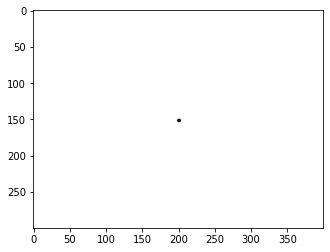

In [9]:
#@title ## Image Luminance (Y) and Chromatizity (IQ) 
#@markdown You can use your image or use mine: imageio:chelsea.png
#@markdown ---
#@markdown ### Enter an Image path:
file_path ='/content/CincMini.png' #@param {type:"string"}
#@markdown ---
im=open_img(file_path)
#Abro la img en PNG como un arreglo
#im =open_img(file_path)
plt.imshow(im)

Button(description='Mostrar Img', style=ButtonStyle())

Output()

Button(description='Mostrar FFT Img', style=ButtonStyle())

Output()

Button(description='Guardar Espectro', style=ButtonStyle())

Output()

Button(description='Cargar Espectro', style=ButtonStyle())

Output()

Button(description='Recuperar Img', style=ButtonStyle())

Output()

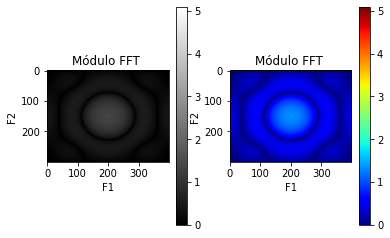

<Figure size 432x288 with 0 Axes>

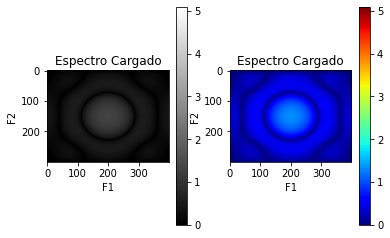

<Figure size 432x288 with 0 Axes>

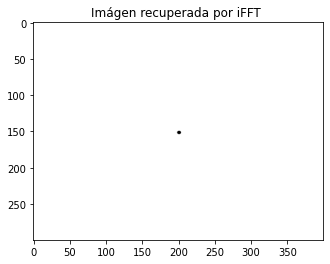

In [14]:
import ipywidgets as widgets
from IPython.display import display

buttonShowImg = widgets.Button(description="Mostrar Img")
outputShowImg = widgets.Output()
def on_button1_clicked(b):
  # Muestra la imágen subida en el paso anterior.
  with outputShowImg:
    plt.figure(0)
    plt.imshow(im,'gray')
    plt.title('Imágen Cargada')
buttonShowImg.on_click(on_button1_clicked)
display(buttonShowImg, outputShowImg)


buttonShowFFT = widgets.Button(description="Mostrar FFT Img")
outputShowFFT = widgets.Output()
def on_button2_clicked(b):
  # Muestra la FFT de la Luminancia de la imágen.
  with outputShowFFT:
      global fftim
      fftim,phase,escMagn=FFTimg(im)
      plt.figure(1)
      plt.subplot(1,2,1)
      plt.imshow(escMagn,'gray')
      plt.colorbar()
      plt.title('Módulo FFT ')
      plt.xlabel('F1')
      plt.ylabel('F2')
      plt.subplot(1,2,2)
      plt.imshow(escMagn,'jet')
      plt.colorbar()
      plt.title('Módulo FFT ')
      plt.xlabel('F1')
      plt.ylabel('F2')
      plt.figure()
buttonShowFFT.on_click(on_button2_clicked)
display(buttonShowFFT, outputShowFFT)


buttonSaveFFTImg = widgets.Button(description="Guardar Espectro")
outputSaveFFTImg = widgets.Output()
def on_button3_clicked(b):
  # Guarda la img en png de la fft.
  with outputSaveFFTImg:
    SaveFFT(fftim,'Im')
buttonSaveFFTImg.on_click(on_button3_clicked)
display(buttonSaveFFTImg, outputSaveFFTImg)

buttonChargeFFTImg = widgets.Button(description="Cargar Espectro")
outputChargeFFTImg = widgets.Output()

def on_button4_clicked(b):
  # Sube el espectro (módulo FFT) de una img y lo muestra.
  with outputChargeFFTImg:
    global fftCh
    fftCh=LoadFFT('Im')
    plt.figure(2)
    plt.subplot(1,2,1)
    plt.imshow((np.log10(1+np.abs(fftCh))),'gray')
    plt.colorbar()
    plt.title('Espectro Cargado')
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.subplot(1,2,2)
    plt.imshow((np.log10(1+np.abs(fftCh))),'jet')
    plt.colorbar()
    plt.title('Espectro Cargado')
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.figure()
buttonChargeFFTImg.on_click(on_button4_clicked)
display(buttonChargeFFTImg, outputChargeFFTImg)

buttonBackImg = widgets.Button(description="Recuperar Img")
outputBackImg = widgets.Output()
def on_button5_clicked(b):
  # A partir de un espectro, y su fase, recupera la imágen, mediante la iFFT.
  with outputBackImg:
    im_back=iFFTimg(fftCh)
    plt.figure(3)
    plt.imshow(im_back,'gray')
    plt.title('Imágen recuperada por iFFT ')
buttonBackImg.on_click(on_button5_clicked)
display(buttonBackImg, outputBackImg)


#Segunda Parte
Para esta segunda parte se utilizan figuras generadas con un programa similar al Paint, y se muestra su espectro.

Tamaño del arreglo (300, 400, 4) donde 300 x 400 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles
Tamaño del arreglo (300, 400, 4) donde 300 x 400 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles
Tamaño del arreglo (300, 400, 4) donde 300 x 400 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles
Tamaño del arreglo (384, 512, 4) donde 384 x 512 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles
0
Tamaño del arreglo (300, 400, 4) donde 300 x 400 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles
1
Tamaño del arreglo (384, 512, 4) donde 384 x 512 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles
2
Tamaño del arreglo (300, 400, 4) donde 300 x 400 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles
3
Tamaño del arreglo (300, 4

<Figure size 432x288 with 0 Axes>

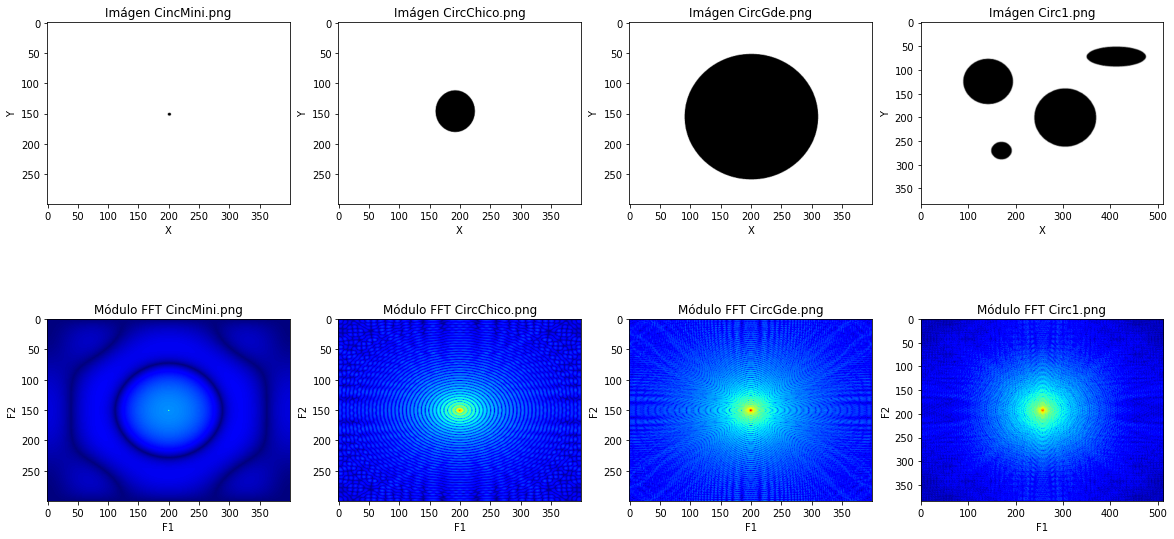

<Figure size 432x288 with 0 Axes>

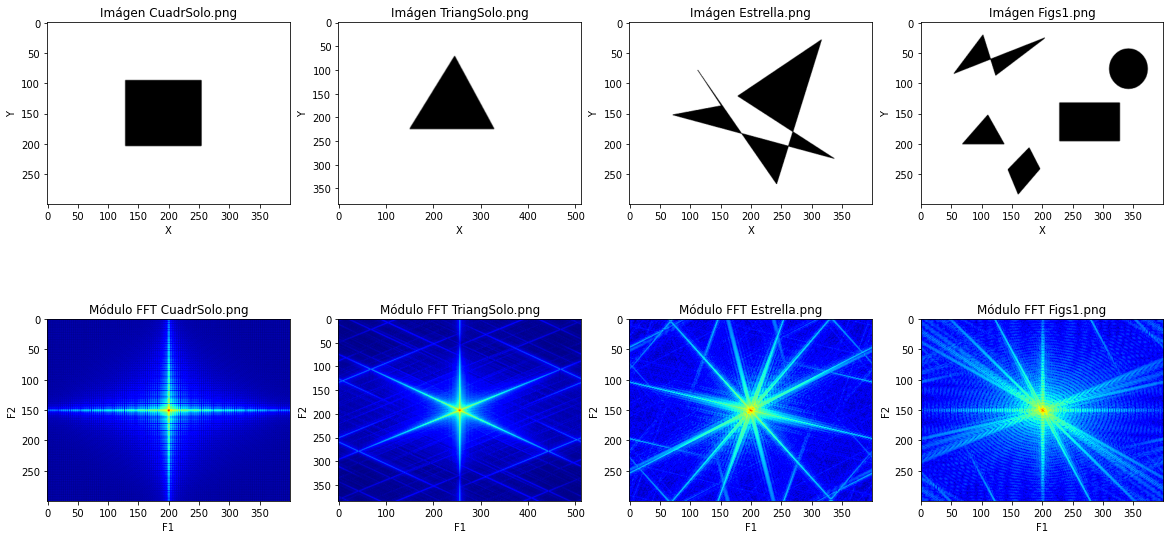

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
imgNames=['CincMini.png','CircChico.png','CircGde.png','Circ1.png']
for i in list(range(0,4)):
  im=open_img('/content/'+imgNames[i]) 
  fftim,phase,escMagn=FFTimg(im)
  plt.subplot(2,4,i+1)
  plt.imshow(im,'gray')
  #plt.colorbar()
  plt.title('Imágen '+imgNames[i])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.subplot(2,4,i+5)
  plt.imshow(escMagn,'jet')
  #plt.colorbar()
  plt.title('Módulo FFT '+imgNames[i])
  plt.xlabel('F1')
  plt.ylabel('F2')
#plt.colorbar()
plt.figure()

plt.figure(figsize=(20,10))
imgNames=['CuadrSolo.png','TriangSolo.png','Estrella.png','Figs1.png']
for i in list(range(0,4)):
  print(i)
  im=open_img('/content/'+imgNames[i])
  fftim,phase,escMagn=FFTimg(im)
  plt.subplot(2,4,i+1)
  plt.imshow(im,'gray')
  #plt.colorbar()
  plt.title('Imágen '+imgNames[i])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.subplot(2,4,i+5)
  plt.imshow(escMagn,'jet')
  #plt.colorbar()
  plt.title('Módulo FFT '+imgNames[i])
  plt.xlabel('F1')
  plt.ylabel('F2')
#plt.colorbar()
plt.figure()

Por otro lado, para generar de manera mas controlada las imágenes, se armaron generando arreglos, solo para explorar la FFT.
En el caso de los rectángulos, se puede ver que en el primer caso, los cruces por cero de la función Sinc serán mas en el eje mayor; ya que la función tiene tantos picos como píxeles el rectángulo.

0.0
3.7782236267660965
Nota*: recta sale y vuelve a entrar al toro en diferentes lugares hasta extinguirse


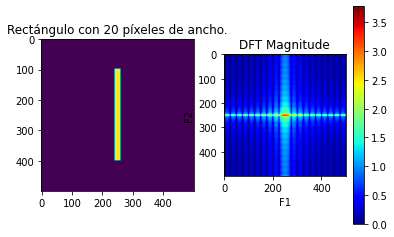

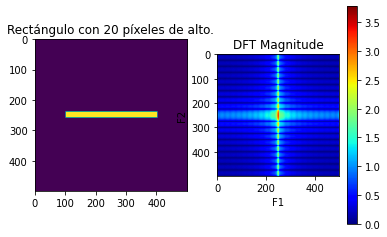

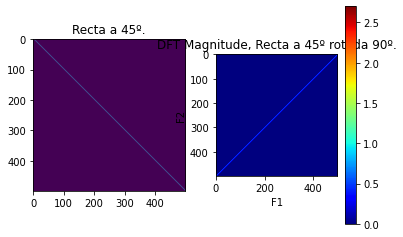

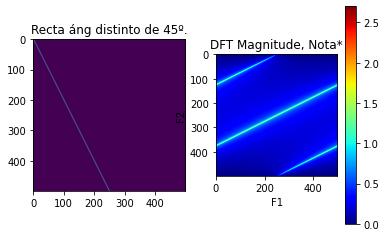

In [45]:
L = 500
x = np.zeros((L, L))
x[100:400, 240:260] = 1
plt.figure(0)
plt.subplot(1,2,1)
plt.imshow(x)
plt.title('Rectángulo con 20 píxeles de ancho.')
X = fp.fftshift(fp.fft2(x))
print(np.min(np.log10(1 + np.abs(X))))
print(np.max(np.log10(1 + np.abs(X))))
plt.subplot(1,2,2)
plt.imshow(np.log10(1 + np.abs(X)), cmap='jet')
plt.colorbar()
plt.title('DFT Magnitude')
plt.xlabel('F1')
plt.ylabel('F2')

L = 500
x = np.zeros((L, L))
x[240:260,100:400 ] = 1

plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(x)
plt.title('Rectángulo con 20 píxeles de alto.')
X = fp.fftshift(fp.fft2(x))
plt.subplot(1,2,2)
plt.imshow(np.log10(1 + np.abs(X)), cmap='jet')
plt.colorbar()
plt.title('DFT Magnitude')
plt.xlabel('F1')
plt.ylabel('F2')

L = 500
x = np.zeros((L, L))
for i in list(range(0,L)):
  x[i,i ] = 1

plt.figure(4)
plt.subplot(1,2,1)
plt.imshow(x)
plt.title('Recta a 45º.')
X = fp.fftshift(fp.fft2(x))
plt.subplot(1,2,2)
plt.imshow(np.log10(1 + np.abs(X)), cmap='jet')
plt.colorbar()
plt.title('DFT Mag., Recta a 45º rotada 90º.')
plt.xlabel('F1')
plt.ylabel('F2')

L = 500
x = np.zeros((L, L))
for i in list(range(0,L)):
  x[i,np.uint(i*0.5)] = 1

plt.figure(6)
plt.subplot(1,2,1)
plt.imshow(x)
plt.title('Recta áng distinto de 45º.')
X = fp.fftshift(fp.fft2(x))
plt.subplot(1,2,2)
plt.imshow(np.log10(1 + np.abs(X)), cmap='jet')
plt.colorbar()
plt.title('DFT Magnitude, Nota*')
plt.xlabel('F1')
plt.ylabel('F2')

print('Nota*: recta sale y vuelve a entrar al toro en diferentes lugares hasta extinguirse')

#Tercer Parte

En primer lugar cargo la imágen, genero y guardo el espectro, y lo recupero para volver a la imágen original.

Tamaño del arreglo (183, 275, 4) donde 183 x 275 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles


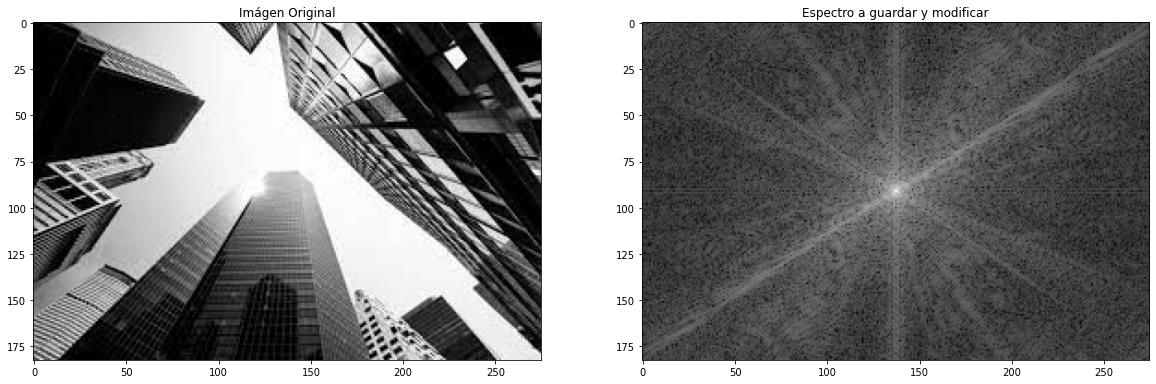

Text(0.5, 1.0, 'Imágen recuperada por iFFT ')

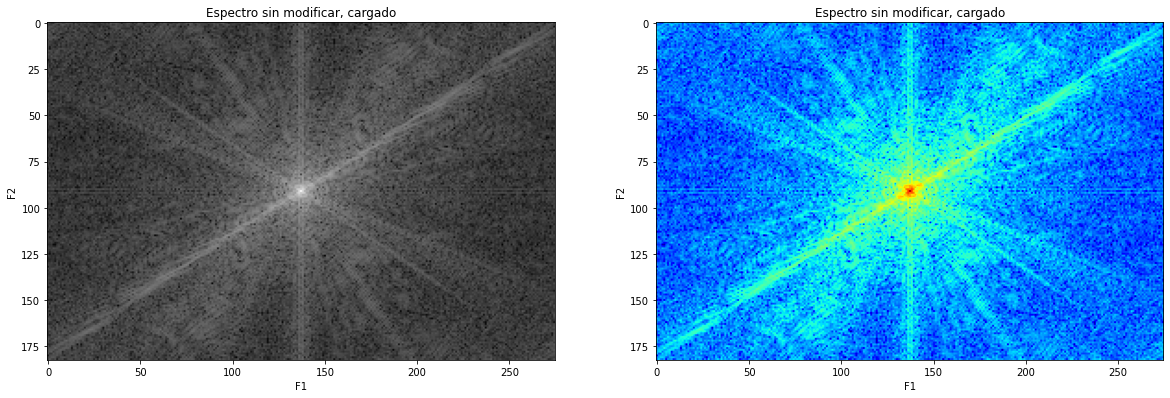

<Figure size 432x288 with 0 Axes>

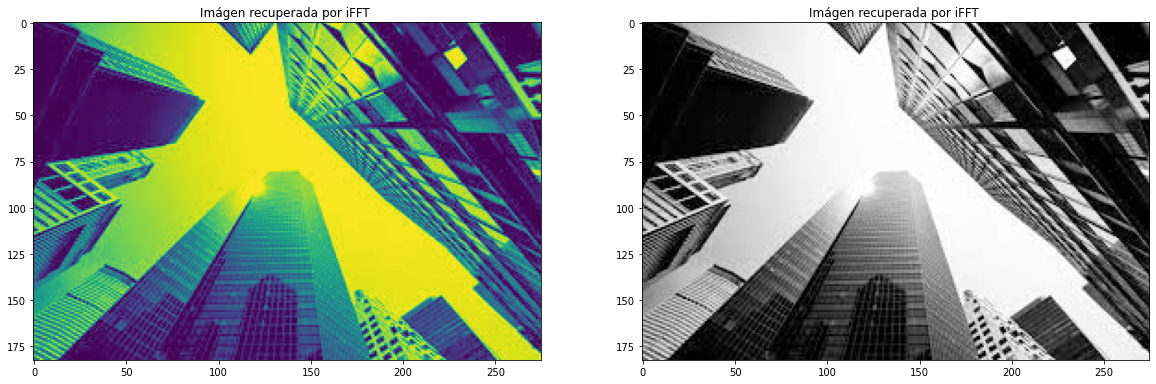

In [24]:

im =open_img('/content/EdifBW.png')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(im,'gray')
plt.title('Imágen Original')
plt.subplot(1,2,2)
plt.imshow(escMagn,'gray')
plt.title('Espectro a guardar y modificar')
plt.show()

SaveFFT(fftim,'ImGral')
fftorig=LoadFFT('ImGral')
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow((np.log10(1+np.abs(fftorig))),'gray')

plt.title('Espectro sin modificar, cargado')
plt.xlabel('F1')
plt.ylabel('F2')
plt.subplot(1,2,2)
plt.imshow((np.log10(1+np.abs(fftorig))),'jet')

plt.title('Espectro sin modificar, cargado')
plt.xlabel('F1')
plt.ylabel('F2')
plt.figure()
im_back=iFFTimg(fftorig)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(im_back)
plt.title('Imágen recuperada por iFFT ')
plt.subplot(1,2,2)
plt.imshow(im_back,'gray')
plt.title('Imágen recuperada por iFFT ')




Ahora, cargo el espectro modificado en Paint, y recupero la imágen.

Tamaño del arreglo (183, 275, 4) donde 183 x 275 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles


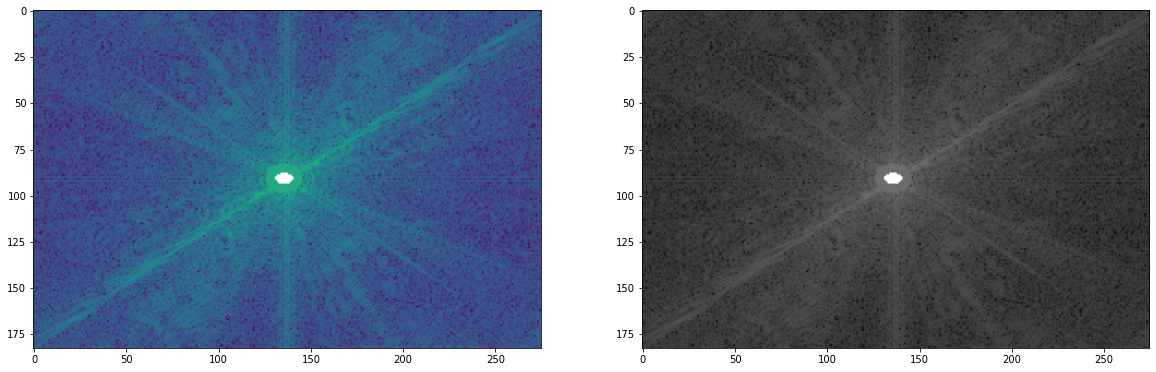

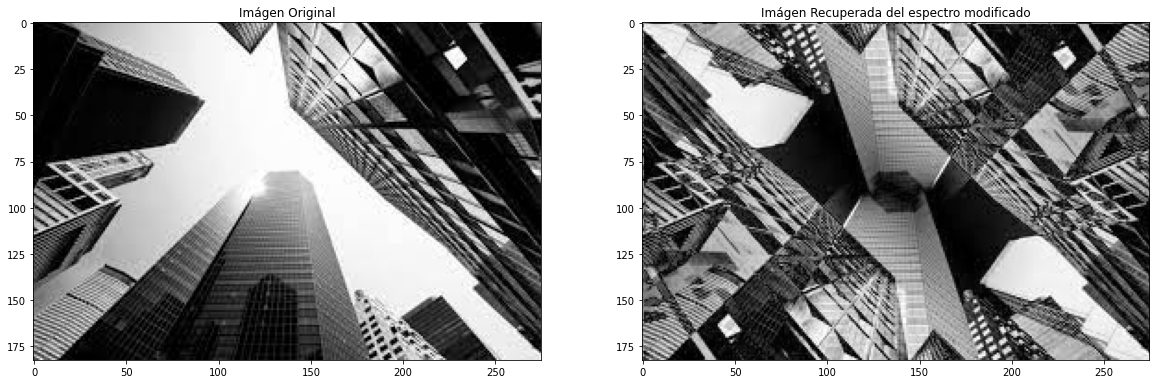

In [25]:
fft_mod =open_img('/content/FFT_modif.png') #cargo el png del espectro modificado

Y_fft_mod=RGB2Y(fft_mod) #calculo su luminancia, que es lo que uso como módulo
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(fft_mod,'gray')
plt.subplot(1,2,2)
plt.imshow(Y_fft_mod,'gray')
NewFig=np.empty(Y_fft_mod.shape, dtype=complex)

# Guardo módulo modificado y fase original
NewFig.real = Y_fft_mod
NewFig.imag =fftorig.imag

SaveFFT(NewFig,'Esp_Im_Mod')
fftEsp_Mod=LoadFFT('Esp_Im_Mod')
im_back=iFFTimg(fftEsp_Mod)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(im,'gray')
plt.title('Imágen Original')
plt.subplot(1,2,2)
plt.imshow(im_back,'gray')
plt.title('Imágen Recuperada del espectro modificado')
plt.show()